# Ciencia de Datos, 2021

## Alan Reyes-Figueroa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.graphics.gofplots import ProbPlot

from plot_diagnostic import diagnostic_plots

import warnings
warnings.filterwarnings('ignore')

## Generate Synthetic data

In [2]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x**2/10.))
beta = np.array([1, 0.1, 3.])
e = np.random.normal(size=nsample)

In [3]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [4]:
print(X.shape, y.shape, beta.shape, e.shape)

(100, 3) (100,) (3,) (100,)


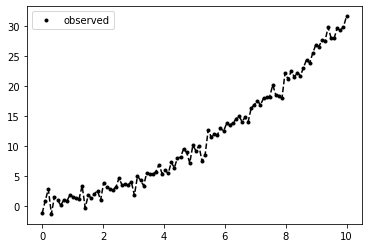

In [5]:
plt.figure()
plt.plot(x, y, 'k.', label='observed')
plt.plot(x, y, 'k--')
plt.legend()
plt.show()

### OLS Model

In [6]:
model = sm.OLS(y, X)
results = model.fit()

In [7]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4388.
Date:                Sat, 15 May 2021   Prob (F-statistic):           7.54e-96
Time:                        23:08:11   Log-Likelihood:                -138.51
No. Observations:                 100   AIC:                             283.0
Df Residuals:                      97   BIC:                             290.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4545      0.289      1.574      0.1

In [8]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [0.45445343 0.41793889 2.65860164]
R2:  0.9890677053938658


In [9]:
betahat = results.params
yhat = X @ betahat

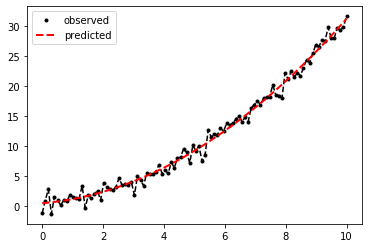

In [10]:
plt.figure()
plt.plot(x, y, 'k.', label='observed')
plt.plot(x, y, 'k--')
plt.plot(x, yhat, 'r--', label='predicted', lw=2)
plt.legend()
plt.show()

In [11]:
alpha = 0.05
prstd, cil, ciu = wls_prediction_std(results, alpha=alpha)
beta = 0.001
prstdb, cilb, ciub = wls_prediction_std(results, alpha=beta)

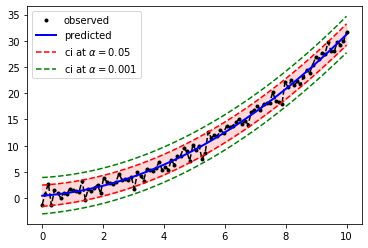

In [12]:
plt.figure()
plt.plot(x, y, 'k.', label='observed')
plt.plot(x, y, 'k--')
plt.plot(x, yhat, 'b-', label='predicted', lw=2)
plt.plot(x, cil, 'r--', label=r'ci at $\alpha=${}'.format(alpha))
plt.plot(x, ciu, 'r--')
plt.plot(x, cilb, 'g--', label=r'ci at $\alpha=${}'.format(beta))
plt.plot(x, ciub, 'g--')
plt.fill_between(x, cil, ciu, color='r', alpha=0.15)
plt.legend()
plt.show()

## OLS con términos no lineales

In [13]:
nsample = 50
sigma = 0.5

x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))

# y = 1 + x + sin(x) + (x-5)^2

beta = np.array([0.5, 1.5, -0.02, 5.])

y_true = X @ beta
e = np.random.normal(size=nsample)
y = y_true + sigma * e

In [14]:
print(X.shape, y.shape, beta.shape, e.shape)

(50, 4) (50,) (4,) (50,)


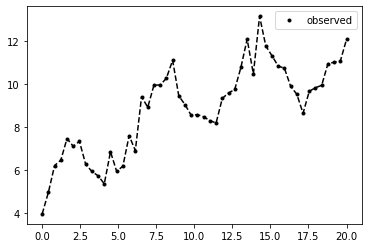

In [15]:
plt.figure()
plt.plot(x, y, 'k.', label='observed')
plt.plot(x, y, 'k--')
plt.legend()
plt.show()

In [16]:
model2 = sm.OLS(y, X)
results2 = model2.fit()

In [17]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     279.7
Date:                Sat, 15 May 2021   Prob (F-statistic):           1.56e-29
Time:                        23:08:12   Log-Likelihood:                -34.045
No. Observations:                  50   AIC:                             76.09
Df Residuals:                      46   BIC:                             83.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5187      0.026     19.797      0.0

In [18]:
print('Parameters: ', results2.params)
print('R2: ', results2.rsquared)

Parameters:  [ 0.51866932  1.48786886 -0.02062066  4.84902153]
R2:  0.9480249243031167


In [19]:
betahat = results2.params
yhat = X @ betahat

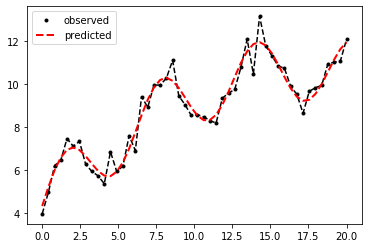

In [20]:
plt.figure()
plt.plot(x, y, 'k.', label='observed')
plt.plot(x, y, 'k--')
plt.plot(x, yhat, 'r--', label='predicted', lw=2)
plt.legend()
plt.show()

In [21]:
alpha = 0.05
prstd, cil, ciu = wls_prediction_std(results2, alpha=alpha)
beta = 0.01
prstdb, cilb, ciub = wls_prediction_std(results2, alpha=beta)

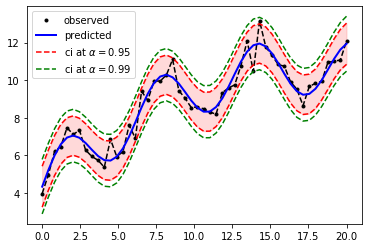

In [22]:
plt.figure()
plt.plot(x, y, 'k.', label='observed')
plt.plot(x, y, 'k--')
plt.plot(x, yhat, 'b-', label='predicted', lw=2)
plt.plot(x, cil, 'r--', label=r'ci at $\alpha=${}'.format(1-alpha))
plt.plot(x, ciu, 'r--')
plt.plot(x, cilb, 'g--', label=r'ci at $\alpha=${}'.format(1-beta))
plt.plot(x, ciub, 'g--')
plt.fill_between(x, cil, ciu, color='r', alpha=0.15)
plt.legend()
plt.show()

## OLS con variables dummy

In [23]:
nsample = 50
groups = np.zeros(nsample, int)
groups[20:40] = 1
groups[40:] = 2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)

In [24]:
dummy = pd.get_dummies(groups).values

x = np.linspace(0, 20, nsample)
# drop reference category
X = np.column_stack((x, dummy[:,1:]))
X = sm.add_constant(X, prepend=False)

In [25]:
print(groups)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2]


In [26]:
print(dummy)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [27]:
beta = np.array([1., 3, -3, 10.])
y_true = X @ beta
e = np.random.normal(size=nsample)
y = y_true + e

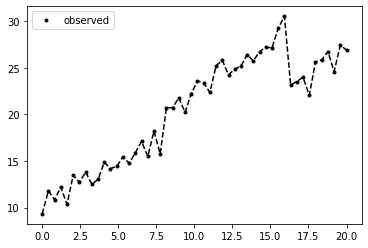

In [28]:
plt.figure()
plt.plot(x, y, 'k.', label='observed')
plt.plot(x, y, 'k--')
plt.legend()
plt.show()

In [29]:
model3 = sm.OLS(y, X)
results3 = model3.fit()

In [30]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     571.3
Date:                Sat, 15 May 2021   Prob (F-statistic):           2.15e-36
Time:                        23:08:12   Log-Likelihood:                -68.256
No. Observations:                  50   AIC:                             144.5
Df Residuals:                      46   BIC:                             152.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9952      0.064     15.453      0.0

In [31]:
print('Parameters: ', results3.params)
print('R2: ', results3.rsquared)

Parameters:  [ 0.99522846  2.72096852 -3.05467691  9.94800062]
R2:  0.9738628403712037


In [32]:
betahat = results3.params
yhat = X @ betahat

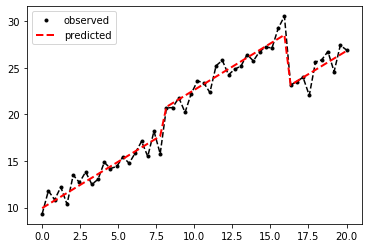

In [33]:
plt.figure()
plt.plot(x, y, 'k.', label='observed')
plt.plot(x, y, 'k--')
plt.plot(x, yhat, 'r--', label='predicted', lw=2)
plt.legend()
plt.show()

In [34]:
alpha = 0.05
prstd, cil, ciu = wls_prediction_std(results3, alpha=alpha)
beta = 0.01
prstdb, cilb, ciub = wls_prediction_std(results3, alpha=beta)

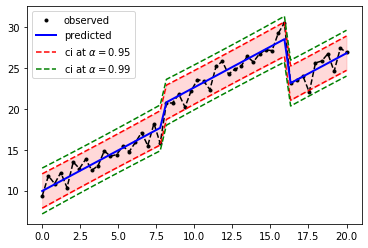

In [35]:
plt.figure()
plt.plot(x, y, 'k.', label='observed')
plt.plot(x, y, 'k--')
plt.plot(x, yhat, 'b-', label='predicted', lw=2)
plt.plot(x, cil, 'r--', label=r'ci at $\alpha=${}'.format(1-alpha))
plt.plot(x, ciu, 'r--')
plt.plot(x, cilb, 'g--', label=r'ci at $\alpha=${}'.format(1-beta))
plt.plot(x, ciub, 'g--')
plt.fill_between(x, cil, ciu, color='r', alpha=0.15)
plt.legend()
plt.show()

In [36]:
#test_grupos = np.random.choice(8, size=(50,))
#print(test_grupos)

In [37]:
#dumm = pd.get_dummies(test_grupos)
#print(dumm[:10])

## Un dataset real

In [38]:
from statsmodels.datasets.longley import load_pandas

y = load_pandas().endog
X = load_pandas().exog

In [39]:
print(X.shape, y.shape)

(16, 6) (16,)


In [40]:
X.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0


In [41]:
y.head()

0    60323.0
1    61122.0
2    60171.0
3    61187.0
4    63221.0
Name: TOTEMP, dtype: float64

<Figure size 504x504 with 0 Axes>

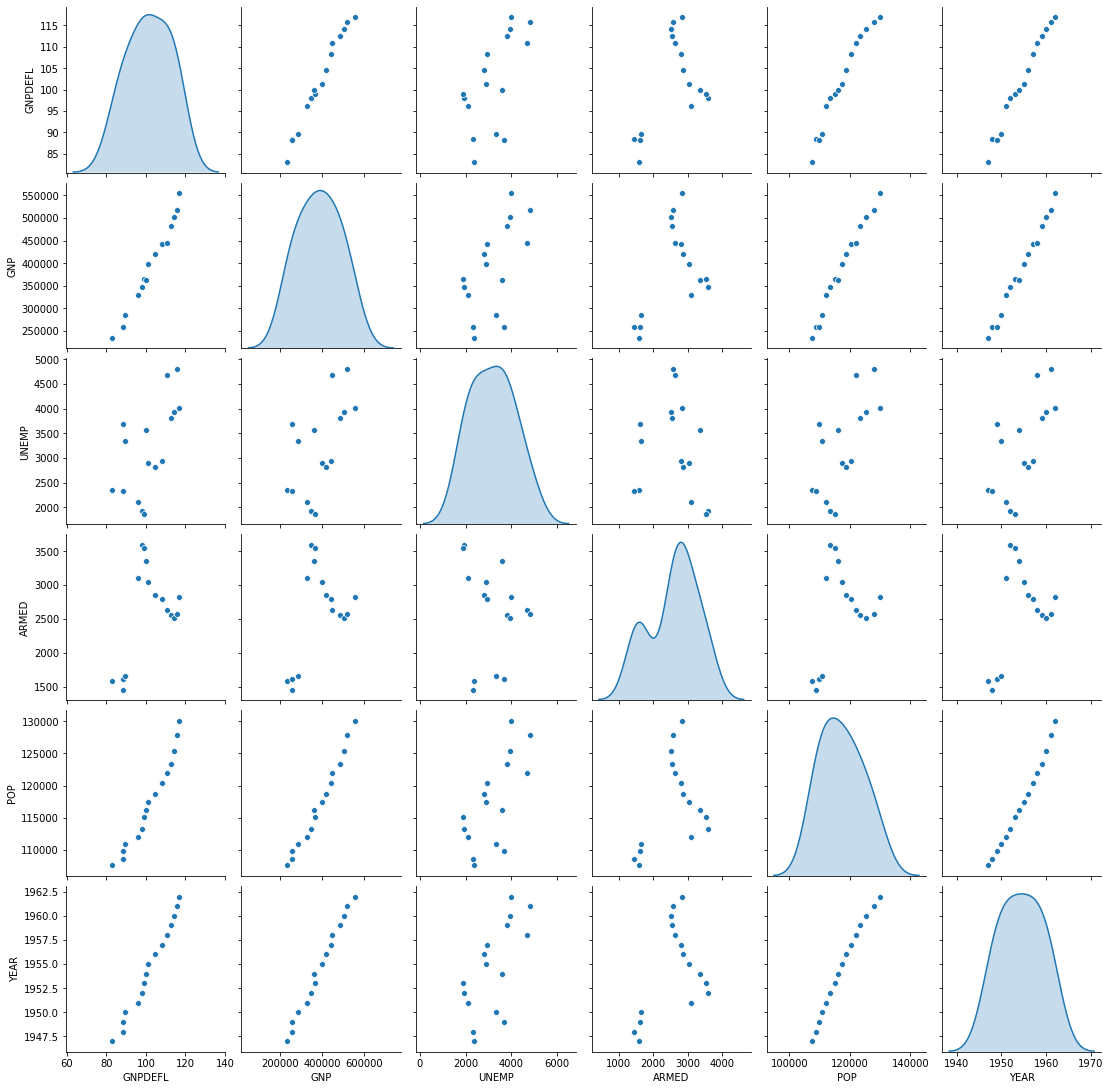

In [42]:
plt.figure(figsize=(7,7))
sns.pairplot(X, diag_kind='kde')
plt.show()

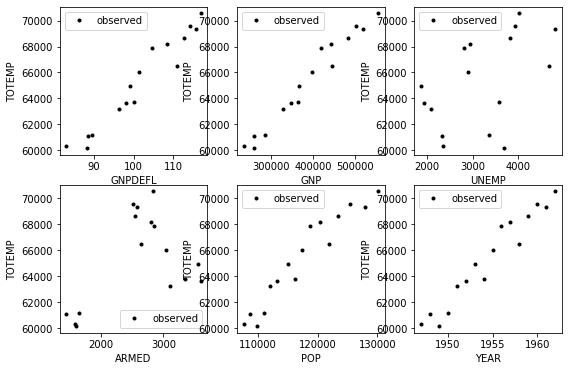

In [43]:
rows = 2
cols = 3

plt.figure(figsize=(9,6))
for i in range(0,rows):
    for j in range(0,cols):
        plt.subplot(rows,cols,cols*i+j+1)
        plt.plot(X.iloc[:,cols*i+j], y, 'k.', label='observed')
        #plt.plot(Xraw.iloc[:,cols*i+j], y, 'k--')
        plt.xlabel(X.columns[cols*i+j])
        plt.ylabel('TOTEMP')
        plt.legend()
plt.show()

In [44]:
model4 = sm.OLS(y, sm.add_constant(X))
results4 = model4.fit()

In [45]:
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Sat, 15 May 2021   Prob (F-statistic):           4.98e-10
Time:                        23:08:19   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.0

In [46]:
print('Parameters: ', results4.params)
print('R2: ', results4.rsquared)

Parameters:  const     -3.482259e+06
GNPDEFL    1.506187e+01
GNP       -3.581918e-02
UNEMP     -2.020230e+00
ARMED     -1.033227e+00
POP       -5.110411e-02
YEAR       1.829151e+03
dtype: float64
R2:  0.9954790045772989


In [47]:
betahat = results4.params
yhat = sm.add_constant(X) @ betahat

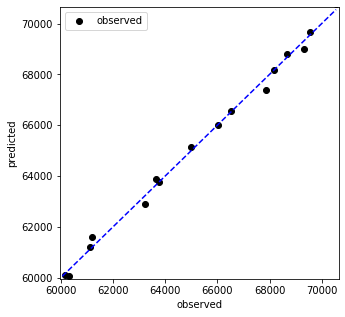

In [48]:
minn = min(y.min(), yhat.min())
maxx = min(y.max(), yhat.max())

plt.figure(figsize=(5,5))
plt.plot(y, yhat, 'ko', label='observed')
#plt.plot(y, yhat, 'b--')
#plt.plot(x, yhat, 'r--', label='predicted', lw=2)
plt.plot([minn,maxx], [minn,maxx], 'b--')
plt.xlabel('observed')
plt.ylabel('predicted')
plt.xlim([minn-100, maxx+100])
plt.ylim([minn-100,maxx+100])
plt.legend()
plt.show()

In [49]:
alpha = 0.05
prstd, cil, ciu = wls_prediction_std(results4, alpha=alpha)
beta = 0.01
prstdb, cilb, ciub = wls_prediction_std(results4, alpha=beta)

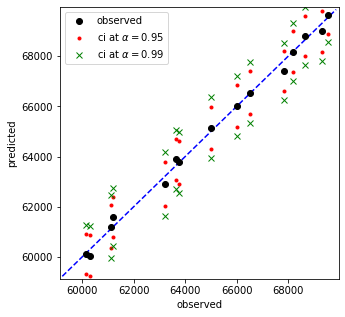

In [50]:
minn = min(y.min(), yhat.min(), cil.min(), ciu.min())
maxx = min(y.max(), yhat.max(), cil.max(), ciu.max())

plt.figure(figsize=(5,5))
plt.plot([minn,maxx], [minn,maxx], 'b--')
plt.plot(y, yhat, 'ko', label='observed')
plt.plot(y, cil, 'r.', label=r'ci at $\alpha=${}'.format(1-alpha))
plt.plot(y, ciu, 'r.')
plt.plot(y, cilb, 'gx', label=r'ci at $\alpha=${}'.format(1-beta))
plt.plot(y, ciub, 'gx')
#plt.fill_between(y, cil, ciu, color='r', alpha=0.15)
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.xlim([minn-100, maxx+100])
plt.ylim([minn-100,maxx+100])
plt.legend()
plt.show()

plt.show()

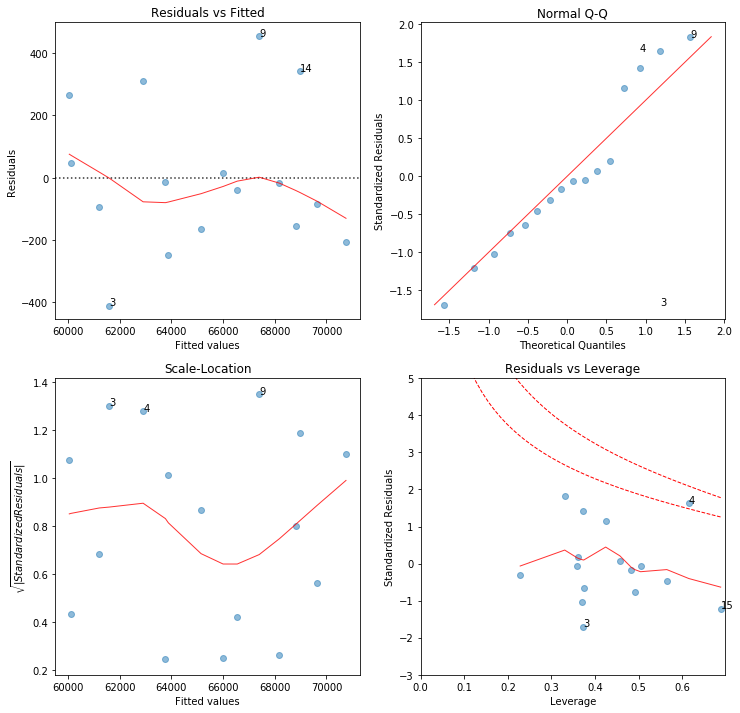

In [51]:
diagnostic_plots(X, y, results4)

## Statsmodels API Formula

In [52]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [53]:
df.head()

,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,MainCity,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,E,Ain,28870,15890,37,5098,33120,35039,2:Med,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,N,Aisne,26226,5521,51,8901,14572,12831,2:Med,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,C,Allier,26747,7925,13,10973,17044,114121,2:Med,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,1:Sm,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,1:Sm,...,22,23,64,79,35,7,1,320.280,5549,129.10


In [54]:
df = df[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()

In [55]:
df.head()

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E


### Sin categórica

In [56]:
X = df.iloc[:,1:-1]
X = sm.add_constant(X)
X['Literacy*Wealth'] = X['Literacy']*X['Wealth']
y = df.iloc[:,0]

In [57]:
print(X.shape, y.shape)

(85, 4) (85,)


In [58]:
X.head()

,const,Literacy,Wealth,Literacy*Wealth
0,1.0,37,73,2701
1,1.0,51,22,1122
2,1.0,13,61,793
3,1.0,46,76,3496
4,1.0,69,83,5727


In [59]:
model5 = smf.ols(formula='Lottery ~ Literacy*Wealth', data=df)
results5 = model5.fit()

In [60]:
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     12.06
Date:                Sat, 15 May 2021   Prob (F-statistic):           1.32e-06
Time:                        23:08:21   Log-Likelihood:                -377.13
No. Observations:                  85   AIC:                             762.3
Df Residuals:                      81   BIC:                             772.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          38.6348     15.825     

In [61]:
print('Parameters: ', results5.params)
print('R2: ', results5.rsquared)

Parameters:  Intercept          38.634815
Literacy           -0.352160
Wealth              0.436437
Literacy:Wealth    -0.000526
dtype: float64
R2:  0.30884024516517383


In [62]:
betahat = results5.params
yhat = X.values @ betahat

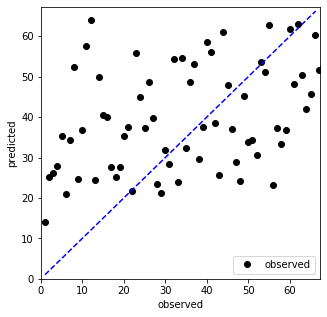

In [63]:
minn = min(y.min(), yhat.min())
maxx = min(y.max(), yhat.max())

plt.figure(figsize=(5,5))
plt.plot(y, yhat, 'ko', label='observed')
#plt.plot(y, yhat, 'b--')
#plt.plot(x, yhat, 'r--', label='predicted', lw=2)
plt.plot([minn,maxx], [minn,maxx], 'b--')
plt.xlabel('observed')
plt.ylabel('predicted')
plt.xlim([minn-1, maxx+1])
plt.ylim([minn-1,maxx+1])
plt.legend()
plt.show()

### Con categórica

In [64]:
dumm = pd.get_dummies(df)
X = dumm.iloc[:,1:]
X = sm.add_constant(X)
y = df.iloc[:,0]

In [65]:
print(X.shape, y.shape)

(85, 8) (85,)


In [66]:
X.head()

,const,Literacy,Wealth,Region_C,Region_E,Region_N,Region_S,Region_W
0,1.0,37,73,0,1,0,0,0
1,1.0,51,22,0,0,1,0,0
2,1.0,13,61,1,0,0,0,0
3,1.0,46,76,0,1,0,0,0
4,1.0,69,83,0,1,0,0,0


In [67]:
#model5 = smf.ols(formula='Lottery ~ Literacy + Wealth + Region', data=df)
model5 = smf.ols(formula='Lottery ~ Literacy + Wealth + Region_C + Region_E + Region_N + Region_S + Region_W', data=dumm)
results5 = model5.fit()

In [68]:
print(results5.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sat, 15 May 2021   Prob (F-statistic):           1.07e-05
Time:                        23:08:21   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     25.5290      8.725      2.926      0.0

In [69]:
print('Parameters: ', results5.params)
print('R2: ', results5.rsquared)

Parameters:  Intercept    25.529000
Literacy     -0.185819
Wealth        0.451475
Region_C     13.122656
Region_E     -2.305130
Region_N      3.105695
Region_S      8.574399
Region_W      3.031380
dtype: float64
R2:  0.3379508691928822


In [70]:
betahat = results5.params
yhat = X.values @ betahat

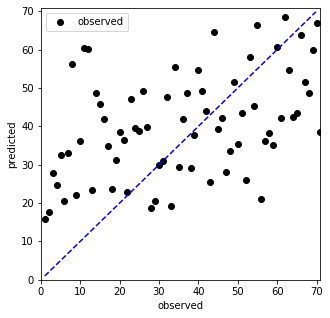

In [71]:
minn = min(y.min(), yhat.min())
maxx = min(y.max(), yhat.max())

plt.figure(figsize=(5,5))
plt.plot(y, yhat, 'ko', label='observed')
#plt.plot(y, yhat, 'b--')
#plt.plot(x, yhat, 'r--', label='predicted', lw=2)
plt.plot([minn,maxx], [minn,maxx], 'b--')
plt.xlabel('observed')
plt.ylabel('predicted')
plt.xlim([minn-1, maxx+1])
plt.ylim([minn-1,maxx+1])
plt.legend()
plt.show()